# Le perceptron

Le perceprton est une des formes les plus simples d'aprentissage machine. 

L'idée initiale a été formulée par {cite:t}`mcculloch_logical_1943` en 1943  et c'est de s'inspirer du fonctionnement des neurones pour créer un algorithme d'aprentissage. Cette idée a été ensuite implémentée par   {cite:t}`rosenblatt_perceptron_1957` en 1957.


Le perceptron récoit des signaux et les processe pour décider si envoyer une information aux autres neurones ou pas:

>La majorité du signal d'entrée vers un neurone est reçu via les dendrites. Il y a environ 1 000 à 10 000 connexions qui sont formées par d'autres neurones à ces dendrites. Le signal des connexions, appelées synapses, se propage à travers la dendrite dans le corps cellulaire. Le potentiel augmente dans le corps cellulaire et une fois qu'il atteint un seuil, le neurone envoie un pic le long de l'axone qui se connecte à environ 100 autres neurones via le terminal axone. (https://ichi.pro/fr/perceptron-explication-implementation-et-un-exemple-visuel-66582574588625)


![](perceptron4.png)

L'idée est donc de modéliser ce comportement en implémentant un algorithme qui reçoit des inputs et qui, pour chaque input donne un output positif ou négatif: dans un cas la connexion est activée, dans l'autre non.

De cette manière l'algorithme est capable, à partir d'un input, de fournir une prédiction. 

Voici une représentation graphique de l'algorithme:

![](perceptron3.png)

Le perceptron permet donc de tracer une division dans un set de données pour les classer:


![](perceptron2.png)

C'est l'exemple le plus simple d'un algorithme d'aprentissage supervisé, qui nous permet de comprendre presque tous les concepts de base qui régissent l'aprentissage machine même des systèmes les plus complexes (réseaux de neurones, transformers etc.).


En particulier nous allons voir les concepts de:

- ground truth (vérité de terrain): les données annotées à partir desquels on entraîne l'algorithme
- inputs, outputs, prévision
- biais
- epoch (nombre d'itérations de la fonction d'aprentissage)
- fonction objectif (loss ou cost function)
- gradient descent
- learning rate
- function d'activation et step function





## Fonctionnement de base de l'algorithme

Le percepron prend une valeur x et la multiplie par un poids w et donne un résultat. Ce résultat est ensuite passé à une fonction d'activation qui décide quel résultat est considéré comme positif et quel résultat est considéré comme négatif et, sur cette base donne une prédiction. Par exemple: si `x*w <= 0` la prédiction est négative, sinon elle est positive.

Par exemple si x = 1 et w = -1 le résultat sera -1 et donc la prédiction négative.

x et w sont normalement des vecteurs du type [1,0,1, ...]. Dans le vecteur, on peut comprendre chaque valeur comme une caractéristique.

Par exemple un chien pourrait être décrit avec les caractéristiques: "possède des glandes mammaires", "a des poils", "est domestique" et "n'est pas un végétal". Cela sera un vecteur avec des valeurs positifs pour les caractéristiques que l'objet possède et 0 pour celles qu'il ne possède pas. Le chien serait donc représenté par le vecteur [1,1,1,0]. Les poids servent pour donner la valeur finale qui sera le produit vectoriel. Par exemple on pourrait avoir des poids [1,1,0,0]. Le produit sera `x1*w1 + x2*w2 + x3*w3 + x4*w4` à savoir, dans ce cas `(1*1 + 1*1 + 1*0 + 0*0) = 2`.

Admettons, dans cet exemple, qu'on veuille trouver les bons poids pour identifier des mammifères, à savoir pour prédire, pour chaque objet, si cet objet est un mammifère ou pas. Le vecteur x pour la balène serait [1,1,0,0], pour le sapin [0,0,0,1], pour le poisson rouge [0,0,1,0], pour une table [0,0,0,0]. Quand l'objet est un mammifère le résultat sera >0 (ou plus précisement 2, car les mammifères ont tous les deux premières caractéristiques), dans les autres cas il sera <=0.

L'objectif de l'algorithme est d'apprendre le bon vecteur des poids. Dans notre exemple, il faudra que le poids soit >0 pour les caractéristiques qui identifient un mammifère (les deux premières) et <=0 pour les autres. Les poids sont initialement choisis de façon aléatoire. Dans la phase d'aprentissage on corrige les poids en confrontant la prédiction de l'algorithme avec le libellé d'une série d'inputs pour lesquels on a établi quelle est la prédiction correcte. Ces données annotées sont ce qu'on appelle "ground truth", vérité de terrain.

Pour reprendre notre exemple des mammifères nous aurons:

- chien: [1,1,0,1] prédiction = 1 (c'est un mammifère)
- balène [1,1,0,0], prédiction = 1 (c'est un mammifère) 
- sapin [0,0,0,1], prédiction = -1 (ce n'est pas un mammifère) 
- poisson rouge [0,0,1,0], prédiction = -1 (ce n'est pas un mammifère)
- table [0,0,0,0], prédiction = -1 (ce n'est pas un mammifère)

On établit maintenant des poids aléatoires, par exemple:

- weights = [0,0,1,1]

Notre objectif est d'écrire un algorithme qui soit capable de corriger ces poids pour arriver aux poids correctes, à savoir [1,1,0,0]

C'est ce que nous ferons avec le perceptron. Le principe de base est que le perceptron regarde le résultat de la prédiction avec les poids initiaux et, si la prédiction correspond au libellé, il ne change pas le poid, sinon il le change.

La règle peut être explicitée comme suit:

```txt
if y != p :
  w = w + (y-p)*x
```



Ici `y` est le libellé, `p` la prédiction (si `x*w <= 0` la prédiction est négative, sinon elle est positive, cf. partie sur la fonction d'activation), `w` le vecteur des poids.


Le perceptron apprend donc a reconnaître les caractéristiques qui font qu'un objet appartienne à une classe particulière. Dans notre exemple, pour rendre notre démarche plus facile à comprendre, ces caractéristiques sont représentée par des 1 ou des 0 (la caractéristique est présente ou pas), mais on peut évidemment penser à des chiffre intérmédiaires, qui représentent un pourcentage (un animal un peu domestique, par exemple, qui aurait 0,5 pour cette caractéristique): le perceprton devra établir le seuil idéal pour séparer les objets et les mettre dans les bonnes classes.



## Fonction d'activation

La fonction d'activation est l'opération qui permet de dire pour quelles valeurs le perceptron donne une réponse positive et pour quelles valeurs il donne une réponse négative. 

Nous avons une prédiction qui est constituée par le produit entre input et poids. Dans notre exemple les poids finaux sont [ 2  1 -1 -1]. Ce produit nous donnera un chiffre. Ici nous disons que si le chiffre est positif le perceptron s'active, sinon non. En effet, les deux premiers poids sont positifs et les autres deux sont négatifs. On utilise donc une fonction d'activation très simple qui s'appelle **Heaviside function**:

```
if np.dot(inputs[a],nw) <=0: #fonction d'activation, ici Heaviside step function
    return 0
else:
    return 1
```

La fonction donne 0 pour toutes les valeurs en dessous de 0 et 1 pour toutes les autres.

![](heaviside.png)

Il y a des fonction d'activation plus complexes: la sigmoïde, par exemple, qui rend le pasage plus doux.

![](sigmoide.png)

Ou la softmax qui au lieu de donner un oui ou un non, donne une distribution de probabilités. Très pratique pour évaluer la probabilité de classe d'un objet complexe ! 

![](softmax.png)


## Un exemple basique avec un vecteur à une seule dimension

Pour comprendre l'algorithme du perceptron, faisons un exemple très simple mathématiquement, en imaginant des objects décrits par un vecteur à une seule dimension.

Faisons un exemple où x = 1 et w = -1 et y = 1

La prédiction est 0, parce que l'input (x =1) multiplié par le poids (-1) donne -1. On a dit que si `x*w <= 0` la prédiction est négative, sinon elle est positive.

Donc x =1, w =-1,  p = 0, y=1 

p et y sont différents donc on aura:

```
if 1 != 0: # et la condition est respecté, donc on applique la fonction suivante)
  w = -1 + (1 - 0)*1 = 1
``` 

De cette manière on aura corrigé le poids à 1. On aura:

x =1, w =1,  p = 1, y=1 

La prévision correspond au libelé.

La règle nous a donc permis de bien corriger le poids. Évidemment la condition de la règle permet de changer le poids si et seulement si la prédiction est différente du libellé.

Le fait d'augmenter le poids de `(y-p)*x` permet de changer le poids dans la bonne direction: si la prédiction p est plus grande du libellé (par ex p =1 y=0), le poids sera diminué, car y-p sera négatif, si c'est l'inverse (p plus petit) alors y-p sera positif et le poids sera augmenté.


### Algorithme du gradient (gradient descent) et loss function

Cette règle de correction est ce qu'on appelle algorithme du gradient (gradient descent):

>L'algorithme du gradient, aussi appelé algorithme de descente de gradient, désigne un algorithme d'optimisation différentiable. Il est par conséquent destiné à minimiser une fonction réelle différentiable définie sur un espace euclidien (par exemple, $$ R n {\displaystyle \mathbb {R} ^{n}}$$ , l'espace des n-uplets de nombres réels, muni d'un produit scalaire) ou, plus généralement, sur un espace hilbertien. L'algorithme est itératif et procède donc par améliorations successives. Au point courant, un déplacement est effectué dans la direction opposée au gradient, de manière à faire décroître la fonction. Le déplacement le long de cette direction est déterminé par la technique numérique connue sous le nom de recherche linéaire. Cette description montre que l'algorithme fait partie de la famille des algorithmes à directions de descente. (https://fr.wikipedia.org/wiki/Algorithme_du_gradient).

Ici l'algorithme du gradient est très simple: il regarde si la prédiction est différente du libellé et, si oui, il corrige les poids.

La descente du gradient est rendue possible par le calcul de ce qu'on appelle la "fonction objectif" ("loss function" ou cost function): https://medium.com/@Anm.Y/understanding-the-loss-function-of-perceptron-a-key-component-in-machine-learning-3f63c8c6cddc C'est la fonction qui vérifie la différence entre le libellé et la prédiction, donc dans notre cas c'est simplement le `y-p`. L'objectif de l'algorithme du gradient est de minimiser la fonction oibjectif, à savoir, réduire le plus possible l'erreur, ici l'écart entre y et p.


## Notre exemple


In [1]:
inputs = [-1,-3,2,4] # x
labels = [0,0,1,1] #y
initial_weight = -30




Ici concrètement on veut trouver tous les chiffres majeures de 0 dans la liste des inputs.

Le poids est choisi de façon aléatoire. Ici je met un poids très loin du poids final pour montrer la fonction des itérations de l'algorithme (ce qu'on appelle des "epochs").

In [2]:
def prediction(a): # a ici sera juste la position de l'objet dans la liste des inputs. Par exemple, si a=0, la fonction traitera le premier objet de la liste inputs, à savoir -1
    if inputs[a]*initial_weight <=0: #activation
        return 0
    else:
        return 1
    

In [3]:
[prediction(i) for i, value in enumerate(inputs)]

[1, 1, 0, 0]

Cette prédition n'est pas bonne: nous voulons [0,0,0,1].

Nous alons donc entraîner le perceptron, en utilisant la condition:

```
if y != p :
  w = w + (y-p)*x
```

Si le libelé de l'objet (y) multiplié par la valeur de l'input (x) multiplié par le poids (w) est mineure ou égale à 0, alors on augmente le poids (w) en lui sommant le produit du libellé (y) fois l'input (x).

donc en python:

```
if labels[n] != prediction(n):
    w = w + (labels[n]-prediction(n)) * inputs[n]
```

### Learning rate

Cette règle risque par contre de changer le poids de façon trop importante si la valeur de l'input est très élévée. Par exemple, si `x =10` on ajoutera `10` au poids, ce qui risque d'être un _overfit_ (on augmente ou on diminue trop). C'est pourquoi on rajoute un autre multiple qui va déterminer de combien on corrige le poids. C'est ce qu'on appelle la learning rate (`ln`), que normalement on fixe avec une valeur enre 0 et 1.

Voici donc notre règle:

```
if y != p :
  w = w + (y-p)*x*ln
```


donc en python:

```
if labels[n] != prediction(n):
    w = w + (labels[n]-prediction(n)) * inputs[n]*ln
```

### Fonction objectif

La condition (if) correspond à la loss function, elle calcule s'il y a une erreur et sa direction. Si `y>p` elle sera positive, si `y<p` négative. C'est pourquoi on intègre `y-p` dans l'instruction qui suit. C'est l'instruction qui correspond à l'algorithme du gradient - décrit plus haut - qui donc augmentera le poid si la prévision est plus petite que le libellé et vice versa.

In [4]:
inputs = [-1,-3,2,4] # x
labels = [0,0,1,1] #y
initial_weight = -10
epochs = 30 # le nombre d'itérations
ln = 0.5 # learning rate
w = initial_weight
for a in range(epochs):

    
    
    for position, value in enumerate(inputs):
        y , x = labels[position], inputs[position]
        yx = y * x
        if w * x <= 0:
            p = 0
        else:
            p = 1
        
        if y != p:
            
            w = w+((y-p) * x *ln)
        print(f"Epoch: {a + 1}\t| dimension: {position}\t| label[{position}]: {y}\t| inputs[{position}]: {x}\t| updated weight: {w}\t| prediction: {p}")
            
            


Epoch: 1	| dimension: 0	| label[0]: 0	| inputs[0]: -1	| updated weight: -9.5	| prediction: 1
Epoch: 1	| dimension: 1	| label[1]: 0	| inputs[1]: -3	| updated weight: -8.0	| prediction: 1
Epoch: 1	| dimension: 2	| label[2]: 1	| inputs[2]: 2	| updated weight: -7.0	| prediction: 0
Epoch: 1	| dimension: 3	| label[3]: 1	| inputs[3]: 4	| updated weight: -5.0	| prediction: 0
Epoch: 2	| dimension: 0	| label[0]: 0	| inputs[0]: -1	| updated weight: -4.5	| prediction: 1
Epoch: 2	| dimension: 1	| label[1]: 0	| inputs[1]: -3	| updated weight: -3.0	| prediction: 1
Epoch: 2	| dimension: 2	| label[2]: 1	| inputs[2]: 2	| updated weight: -2.0	| prediction: 0
Epoch: 2	| dimension: 3	| label[3]: 1	| inputs[3]: 4	| updated weight: 0.0	| prediction: 0
Epoch: 3	| dimension: 0	| label[0]: 0	| inputs[0]: -1	| updated weight: 0.0	| prediction: 0
Epoch: 3	| dimension: 1	| label[1]: 0	| inputs[1]: -3	| updated weight: 0.0	| prediction: 0
Epoch: 3	| dimension: 2	| label[2]: 1	| inputs[2]: 2	| updated weight: 1.0	| 

Maintenant on peut définir une nouvelle fonction de prédiction, basée sur le nouveau poids:

In [5]:
def new_prediction(a):
    if inputs[a]*w <=0:
        
        return 0
    else:
        return 1
[new_prediction(i) for i, value in enumerate(inputs)]

[0, 0, 1, 1]

## Epochs

L'intructionn `for a in range(epochs):` dit combien de fois il faut itérer l'algorithme. C'est ce qu'on appelle des "epochs". Le plus de fois on réitère l'algorithme, le plus on est sûr d'arriver à la bonne valeure. Par exemple, ici, si on avait iteré 7 fois cela n'aurait pas été suffisant:

In [6]:
inputs = [-1,-3,2,4] # x
labels = [0,0,1,1] #y
initial_weight = -10
epochs = 2 # le nombre d'itérations
ln = 0.5 # learning rate
w = initial_weight
for a in range(epochs):

    
    
    for n, value in enumerate(inputs):
        y , x = labels[n], inputs[n]
        yx = y * x
        if w * x <= 0:
            p = 0
        else:
            p = 1
        
        if y != p:
            
            w = w+((y-p) * x *ln)
        print(f"Epoch: {a + 1}\t| dimension: {n}\t| label[{n}]: {y}\t| inputs[{n}]: {x}\t| updated weight: {w}\t| prediction: {p}")
            
            

Epoch: 1	| dimension: 0	| label[0]: 0	| inputs[0]: -1	| updated weight: -9.5	| prediction: 1
Epoch: 1	| dimension: 1	| label[1]: 0	| inputs[1]: -3	| updated weight: -8.0	| prediction: 1
Epoch: 1	| dimension: 2	| label[2]: 1	| inputs[2]: 2	| updated weight: -7.0	| prediction: 0
Epoch: 1	| dimension: 3	| label[3]: 1	| inputs[3]: 4	| updated weight: -5.0	| prediction: 0
Epoch: 2	| dimension: 0	| label[0]: 0	| inputs[0]: -1	| updated weight: -4.5	| prediction: 1
Epoch: 2	| dimension: 1	| label[1]: 0	| inputs[1]: -3	| updated weight: -3.0	| prediction: 1
Epoch: 2	| dimension: 2	| label[2]: 1	| inputs[2]: 2	| updated weight: -2.0	| prediction: 0
Epoch: 2	| dimension: 3	| label[3]: 1	| inputs[3]: 4	| updated weight: 0.0	| prediction: 0


Il nous faut le faire plus de fois.

In [7]:
inputs = [-1,-3,2,4] # x
labels = [0,0,1,1] #y
initial_weight = -10
epochs = 4 # le nombre d'itérations
ln = 0.5 # learning rate
w = initial_weight
for a in range(epochs):

    
    
    for n, value in enumerate(inputs):
        y , x = labels[n], inputs[n]
        yx = y * x
        if w * x <= 0:
            p = 0
        else:
            p = 1
        
        if y != p:
            
            w = w+((y-p) * x *ln)
        print(f"Epoch: {a + 1}\t| dimension: {n}\t| label[{n}]: {y}\t| inputs[{n}]: {x}\t| updated weight: {w}\t| prediction: {p}")
            
            

Epoch: 1	| dimension: 0	| label[0]: 0	| inputs[0]: -1	| updated weight: -9.5	| prediction: 1
Epoch: 1	| dimension: 1	| label[1]: 0	| inputs[1]: -3	| updated weight: -8.0	| prediction: 1
Epoch: 1	| dimension: 2	| label[2]: 1	| inputs[2]: 2	| updated weight: -7.0	| prediction: 0
Epoch: 1	| dimension: 3	| label[3]: 1	| inputs[3]: 4	| updated weight: -5.0	| prediction: 0
Epoch: 2	| dimension: 0	| label[0]: 0	| inputs[0]: -1	| updated weight: -4.5	| prediction: 1
Epoch: 2	| dimension: 1	| label[1]: 0	| inputs[1]: -3	| updated weight: -3.0	| prediction: 1
Epoch: 2	| dimension: 2	| label[2]: 1	| inputs[2]: 2	| updated weight: -2.0	| prediction: 0
Epoch: 2	| dimension: 3	| label[3]: 1	| inputs[3]: 4	| updated weight: 0.0	| prediction: 0
Epoch: 3	| dimension: 0	| label[0]: 0	| inputs[0]: -1	| updated weight: 0.0	| prediction: 0
Epoch: 3	| dimension: 1	| label[1]: 0	| inputs[1]: -3	| updated weight: 0.0	| prediction: 0
Epoch: 3	| dimension: 2	| label[2]: 1	| inputs[2]: 2	| updated weight: 1.0	| 

On observe que dans les dernières epochs les update weight ne change pas cela veut certainement dire que l'on a convergé vers un poids final.
Cependant on a peut-être trouver un minimum local depuis notre état de poids aléatoire qui ne generaliserait que sur nos datas d'entraînement (mais c'est une histoire pour un cours plus avancée).

## Exemple avec un vecteur à 3 dimensions

Essayons maintenant avec l'exemple des mammifères. Ici chaque objet est représenté par 4 valeurs. La seule différence est qu'au lieu de simples multiplications, il faudra faire des produits vectoriaux.

Nous avons dit que nous avons le corpus suivant:



- chien: [1,1,0,1] prédiction = 1 (c'est un mammifère)
- balène [1,1,0,0], prédiction = 1 (c'est un mammifère) 
- sapin [0,0,0,1], prédiction = -1 (ce n'est pas un mammifère) 
- poisson rouge [0,0,1,0], prédiction = -1 (ce n'est pas un mammifère)
- table [0,0,0,0], prédiction = -1 (ce n'est pas un mammifère)


Le vecteur y sera l'ensemble des libellés dans l'ordre, et donc [1,1,-1,-1,-1]
Et des poids aléatoires, par exemple:

- weights = [-1,-2,10,1] (évidemment on peut mettre ici n'importe quelle valeur)

Nous voulons arriver à des poids du type: [>=1,>=1,<=0,<=0] Pour que la fonction d'activation s'active seulement si l'objet est un mammifère.



In [8]:
import numpy as np
inputs = [ # x
    [1,1,0,1], #chien
    [1,1,0,0], #balène
    [0,0,0,1], #sapin
    [0,0,1,0], #poisson rouge
    [0,0,0,0] #table
]
labels = [ #y
    1, #chien
    1, #balène
    -1, #sapin
    -1, #poisson rouge
    -1 #table
] 
weights = [0,0,0,0] #aléatoire


inputs = [np.array(v) for v in inputs ] 
weights = np.array(weights)



In [9]:
import numpy as np
np.dot(inputs[0], weights)

0

In [10]:
import numpy as np

def prediction(a):
    if np.dot(inputs[a],weights) <=0: #fonction d'activation, ici Heaviside step function
        return -1
    else:
        return 1
    

Maintenant on peut voir les différentes  prédictions avec les poids existants:

In [11]:
prediction(0)

-1

In [12]:
[prediction(i) for i, value in enumerate(inputs)]

[-1, -1, -1, -1, -1]

Les prédictions ne sont pas bonnes: on a [1, -1, 1, 1, -1] et on voudrait [1,1,-1,-1,-1]. Nous passons donc à la phase d'aprentissage:

In [13]:

nw = weights
learning_rate = 0.5 
epochs=30

for a in range(epochs): # les epoch, à savoir combien de fois on réitère l'aprentissage pour corriger les poids
    for n, (x, y) in enumerate(zip(inputs, labels)):
    
    
        if np.dot(x,  nw) <= 0:
            p = 0
        else:
            p = 1
        
        if y != p:
           
            
            nw = nw + np.dot((y-p),  x) * learning_rate
        print(f"Epoch: {a + 1}\t| training vector index: {n}\t| label[{n}]: {y}\t| inputs[{n}]: {x}\t| updated weight: {nw}")
    #if (a + 1) % 5 == 0:
     #   print(f"Prediction at {a + 1} epochs:",   [prediction(vector, iteration_weight) for vector in inputs])
            
           

Epoch: 1	| training vector index: 0	| label[0]: 1	| inputs[0]: [1 1 0 1]	| updated weight: [0.5 0.5 0.  0.5]
Epoch: 1	| training vector index: 1	| label[1]: 1	| inputs[1]: [1 1 0 0]	| updated weight: [0.5 0.5 0.  0.5]
Epoch: 1	| training vector index: 2	| label[2]: -1	| inputs[2]: [0 0 0 1]	| updated weight: [ 0.5  0.5  0.  -0.5]
Epoch: 1	| training vector index: 3	| label[3]: -1	| inputs[3]: [0 0 1 0]	| updated weight: [ 0.5  0.5 -0.5 -0.5]
Epoch: 1	| training vector index: 4	| label[4]: -1	| inputs[4]: [0 0 0 0]	| updated weight: [ 0.5  0.5 -0.5 -0.5]
Epoch: 2	| training vector index: 0	| label[0]: 1	| inputs[0]: [1 1 0 1]	| updated weight: [ 0.5  0.5 -0.5 -0.5]
Epoch: 2	| training vector index: 1	| label[1]: 1	| inputs[1]: [1 1 0 0]	| updated weight: [ 0.5  0.5 -0.5 -0.5]
Epoch: 2	| training vector index: 2	| label[2]: -1	| inputs[2]: [0 0 0 1]	| updated weight: [ 0.5  0.5 -0.5 -1. ]
Epoch: 2	| training vector index: 3	| label[3]: -1	| inputs[3]: [0 0 1 0]	| updated weight: [ 0.5  0

Epoch: 26	| training vector index: 0	| label[0]: 1	| inputs[0]: [1 1 0 1]	| updated weight: [  4.5   4.5 -12.5  -8.5]
Epoch: 26	| training vector index: 1	| label[1]: 1	| inputs[1]: [1 1 0 0]	| updated weight: [  4.5   4.5 -12.5  -8.5]
Epoch: 26	| training vector index: 2	| label[2]: -1	| inputs[2]: [0 0 0 1]	| updated weight: [  4.5   4.5 -12.5  -9. ]
Epoch: 26	| training vector index: 3	| label[3]: -1	| inputs[3]: [0 0 1 0]	| updated weight: [  4.5   4.5 -13.   -9. ]
Epoch: 26	| training vector index: 4	| label[4]: -1	| inputs[4]: [0 0 0 0]	| updated weight: [  4.5   4.5 -13.   -9. ]
Epoch: 27	| training vector index: 0	| label[0]: 1	| inputs[0]: [1 1 0 1]	| updated weight: [  5.    5.  -13.   -8.5]
Epoch: 27	| training vector index: 1	| label[1]: 1	| inputs[1]: [1 1 0 0]	| updated weight: [  5.    5.  -13.   -8.5]
Epoch: 27	| training vector index: 2	| label[2]: -1	| inputs[2]: [0 0 0 1]	| updated weight: [  5.   5. -13.  -9.]
Epoch: 27	| training vector index: 3	| label[3]: -1	| in

In [14]:
nw

array([  5.5,   5.5, -15. , -10. ])

In [15]:

def prediction_n(a):
    if np.dot(inputs[a],nw) <=0: #fonction d'activation, ici Heaviside step function
        return 0
    else:
        return 1

In [16]:
[prediction_n(i) for i, value in enumerate(inputs)]

[1, 1, 0, 0, 0]

et c'est la bonne!

Maintenant essyaons de prédire la mammiférité pour des vecteurs jamais vu à l'entrainement:

- araignée [0,1,0,0]
- livre [0,0,0,0]





In [17]:
inputs = [[0,1,0,0],[0,0,0,0]]
[prediction_n(i) for i, value in enumerate(inputs)]

[1, 0]

### La prédiction est fausse pour l'araignée!

Nos poids pour les deux premières caractéristiques sont positifs, ce qui montre que le perceptron a une idée de ce qu'est un mammifère, Mais il y a un biais par rapport à la caractéristique "végétal et domestique".

Cela nous revèle que notre description de nos objets est assez pauvre et pas suffisante pour avoir des prédictions correctes.

On peut essayer avec des données plus complexes avec des caractéristiques mieux choisies.

Par exemple, prenons en compte ces caractéristiques:

- glandes mammaires
- poils
- ailes
- branches
- yeux
- vit dans l'eau
- felin
- domestique
- vertebré

Et un corpus d'entraînement composé de:

inputs = [
         [1,1, 0,0,1,0,0,1,1], #chien
         [1,1, 0,0,1,0,1,1,1], #chat
         [1,1, 0,0,1,0,0,1,1], #éléphant
         [1,1, 0,0,1,1,0,0,1], #balène
         [1,1, 0,0,1,1,0,1,1], #dauphin
         [0,0, 0,1,1,1,0,1,1], #poisson rouge
         [0,0, 1,0,1,0,0,1,1], #poule
         [0,0, 1,0,1,0,0,0,1], #faucon
         [0,0, 1,0,1,0,0,0,0], #papillon
         ]

Et ensuite on essayera de deviner:

test = [
         [1,1, 0,0,1,0,1,0,1], #tigre
         [0,0, 0,0,1,1,0,0,1], #requin
         [0,1, 0,0,1,0,0,0,0], #araignée
         
         ]




In [18]:
inputs = [
         [1,1, 0,0,1,0,0,1,1], #chien
         [1,1, 0,0,1,0,1,1,1], #chat
         [1,1, 0,0,1,0,0,1,1], #éléphant
         [1,1, 0,0,1,1,0,0,1], #balène
         [1,1, 0,0,1,1,0,1,1], #dauphin
         [0,0, 0,1,1,1,0,1,1], #poisson rouge
         [0,0, 1,0,1,0,0,1,1], #poule
         [0,0, 1,0,1,0,0,0,1], #faucon
         [0,0, 1,0,1,0,0,0,0], #papillon
         ]


test = [
         [1,1, 0,0,1,0,1,0,1], #tigre
         [0,0, 0,0,1,1,0,0,1], #requin
         [0,1, 0,0,1,0,0,0,0], #araignée
         
         ]

labels = [1,1,1,1,1,0,0,0,0]

weights = [0,0,0,0,0,0,0,0,0]
test = [
         [1,1, 0,0,1,1,0,1,0], #tigre
         [0,0, 0,0,1,0,1,0,0], #requin
         [0,1, 0,0,1,1,0,0,0], #araignée
         
         ]
nw = weights
learning_rate = 0.5 
epochs=30

for a in range(epochs): # les epoch, à savoir combien de fois on réitère l'aprentissage pour corriger les poids
    for n, (x, y) in enumerate(zip(inputs, labels)):
    
    
        if np.dot(x,  nw) <= 0:
            p = 0
        else:
            p = 1
        
        if y != p:
           
            
            nw = nw + np.dot((y-p),  x) * learning_rate
        print(f"Epoch: {a + 1}\t| training vector index: {n}\t| label[{n}]: {y}\t| inputs[{n}]: {x}\t| updated weight: {nw}")


Epoch: 1	| training vector index: 0	| label[0]: 1	| inputs[0]: [1, 1, 0, 0, 1, 0, 0, 1, 1]	| updated weight: [0.5 0.5 0.  0.  0.5 0.  0.  0.5 0.5]
Epoch: 1	| training vector index: 1	| label[1]: 1	| inputs[1]: [1, 1, 0, 0, 1, 0, 1, 1, 1]	| updated weight: [0.5 0.5 0.  0.  0.5 0.  0.  0.5 0.5]
Epoch: 1	| training vector index: 2	| label[2]: 1	| inputs[2]: [1, 1, 0, 0, 1, 0, 0, 1, 1]	| updated weight: [0.5 0.5 0.  0.  0.5 0.  0.  0.5 0.5]
Epoch: 1	| training vector index: 3	| label[3]: 1	| inputs[3]: [1, 1, 0, 0, 1, 1, 0, 0, 1]	| updated weight: [0.5 0.5 0.  0.  0.5 0.  0.  0.5 0.5]
Epoch: 1	| training vector index: 4	| label[4]: 1	| inputs[4]: [1, 1, 0, 0, 1, 1, 0, 1, 1]	| updated weight: [0.5 0.5 0.  0.  0.5 0.  0.  0.5 0.5]
Epoch: 1	| training vector index: 5	| label[5]: 0	| inputs[5]: [0, 0, 0, 1, 1, 1, 0, 1, 1]	| updated weight: [ 0.5  0.5  0.  -0.5  0.  -0.5  0.   0.   0. ]
Epoch: 1	| training vector index: 6	| label[6]: 0	| inputs[6]: [0, 0, 1, 0, 1, 0, 0, 1, 1]	| updated weight: 

Epoch: 25	| training vector index: 1	| label[1]: 1	| inputs[1]: [1, 1, 0, 0, 1, 0, 1, 1, 1]	| updated weight: [ 0.5  0.5  0.  -0.5  0.  -0.5  0.   0.   0. ]
Epoch: 25	| training vector index: 2	| label[2]: 1	| inputs[2]: [1, 1, 0, 0, 1, 0, 0, 1, 1]	| updated weight: [ 0.5  0.5  0.  -0.5  0.  -0.5  0.   0.   0. ]
Epoch: 25	| training vector index: 3	| label[3]: 1	| inputs[3]: [1, 1, 0, 0, 1, 1, 0, 0, 1]	| updated weight: [ 0.5  0.5  0.  -0.5  0.  -0.5  0.   0.   0. ]
Epoch: 25	| training vector index: 4	| label[4]: 1	| inputs[4]: [1, 1, 0, 0, 1, 1, 0, 1, 1]	| updated weight: [ 0.5  0.5  0.  -0.5  0.  -0.5  0.   0.   0. ]
Epoch: 25	| training vector index: 5	| label[5]: 0	| inputs[5]: [0, 0, 0, 1, 1, 1, 0, 1, 1]	| updated weight: [ 0.5  0.5  0.  -0.5  0.  -0.5  0.   0.   0. ]
Epoch: 25	| training vector index: 6	| label[6]: 0	| inputs[6]: [0, 0, 1, 0, 1, 0, 0, 1, 1]	| updated weight: [ 0.5  0.5  0.  -0.5  0.  -0.5  0.   0.   0. ]
Epoch: 25	| training vector index: 7	| label[7]: 0	| input

In [19]:
[prediction_n(i) for i, value in enumerate(inputs)]

[1, 1, 1, 1, 1, 0, 0, 0, 0]

In [20]:
def prediction_n(a):
    if np.dot(test[a],nw) <=0: #fonction d'activation, ici Heaviside step function
        return 0
    else:
        return 1

In [21]:
[prediction_n(i) for i, value in enumerate(test)]

[1, 0, 0]

## Biais

Dans notre algorithme nous n'avons pas eu besoin d'ajouter un biais. Nous avions en effet bien choisi les caractéristiques de nos chiffres d'input pour différencier les positifs des négatifs. Mais si les input ne sont pas séparés de cette manière, alors il nous faut ajouter quelque chose pour bien trouver nos poids. Par exemple dans l'image suivante:

![](biais.png)

Le biais est ajouté au produit vectoriel entre input et poids et lui aussi est établi de façon aléatoire au début et ensuite appris par l'algorithme.


>But you may be noticed that one of the inputs to the perceptron is zero, this might not be good sometimes since it will affect the training process. If you try to change the weights, it will not make any effect since the input is still zero. Here we need to add a new term to the equation which is known as bias. Bias will help to shift the activation to the left or right during the training of the Perceptron algorithm. https://www.pycodemates.com/2022/12/perceptron-algorithm-understanding-and-implementation-python.html

On peut comprendre le concept de biais en revenant à notre exemple initial, avec un vecteur à une dimension.
La règle du perceprton nous permet de trouver des poids qui fassent une séparation entre les chiffres positifs et négatifs. C'était notre exemple. Mais que se passe-til si on veut trouver les chiffres majeures de 5, par exemple? Notre code ne sera pas suffisant:

In [22]:
inputs = [-1,2,3,4] # x
labels = [0,0,1,1] #y seulement 6 et 10 sont majeurs de 5
weight = 0
epochs = 100 # le nombre d'itérations

w = weight
for a in range(epochs):

    for n, value in enumerate(inputs):
        print('n =' + str(n))
    
    
        if w * inputs[n] <= 0:
            p = 0
        else:
            p = 1
        
        if labels[n] != p:
            w = w + (labels[n]-p) * inputs[n]
            
            print(labels[n])
            print(p)
            print('poids: ' + str(w))
            
    

print('poids final: ' + str(w))   


def new_prediction(a):
    if inputs[a]*w  <=0:
        return 0
    else:
        return 1


n =0
n =1
n =2
1
0
poids: 3
n =3
n =0
n =1
0
1
poids: 1
n =2
n =3
n =0
n =1
0
1
poids: -1
n =2
1
0
poids: 2
n =3
n =0
n =1
0
1
poids: 0
n =2
1
0
poids: 3
n =3
n =0
n =1
0
1
poids: 1
n =2
n =3
n =0
n =1
0
1
poids: -1
n =2
1
0
poids: 2
n =3
n =0
n =1
0
1
poids: 0
n =2
1
0
poids: 3
n =3
n =0
n =1
0
1
poids: 1
n =2
n =3
n =0
n =1
0
1
poids: -1
n =2
1
0
poids: 2
n =3
n =0
n =1
0
1
poids: 0
n =2
1
0
poids: 3
n =3
n =0
n =1
0
1
poids: 1
n =2
n =3
n =0
n =1
0
1
poids: -1
n =2
1
0
poids: 2
n =3
n =0
n =1
0
1
poids: 0
n =2
1
0
poids: 3
n =3
n =0
n =1
0
1
poids: 1
n =2
n =3
n =0
n =1
0
1
poids: -1
n =2
1
0
poids: 2
n =3
n =0
n =1
0
1
poids: 0
n =2
1
0
poids: 3
n =3
n =0
n =1
0
1
poids: 1
n =2
n =3
n =0
n =1
0
1
poids: -1
n =2
1
0
poids: 2
n =3
n =0
n =1
0
1
poids: 0
n =2
1
0
poids: 3
n =3
n =0
n =1
0
1
poids: 1
n =2
n =3
n =0
n =1
0
1
poids: -1
n =2
1
0
poids: 2
n =3
n =0
n =1
0
1
poids: 0
n =2
1
0
poids: 3
n =3
n =0
n =1
0
1
poids: 1
n =2
n =3
n =0
n =1
0
1
poids: -1
n =2
1
0
poids: 2
n =3
n =0


L'algorithme a trouvé un poid final de 3... mais 3 multiplié par les chiffres en question ne nous permettra pas de trouver celles majeures de 5:

In [23]:
[new_prediction(a) for a,v in enumerate(inputs)]

[0, 1, 1, 1]

On voulait: [-1,-1,1,1].

C'est là que l'ajout d'un biais" est utile. Il sert pour "déplacer" notre ligne de séparation de 0 vers un chiffre plus convenable. Ici ...

Pour ce faire nous allons ajouter ce paramètre aléatoire aussi et entraîner l'algorithme pour deviner aussi ce chiffre en modifiant notre fonction d'entraînement comme suit:

In [24]:
inputs = [-1,2,3,4] # x
labels = [0,0,1,1] #y seulement 6 et 10 sont majeurs de 5
weight = 0
epochs = 100 # le nombre d'itérations
bias = 0
w = weight
for a in range(epochs):

    for n, value in enumerate(inputs):
        print('n =' + str(n))
    
    
        if w * inputs[n] + bias <= 0:
            p = 0
        else:
            p = 1
        
        if labels[n] != p:
            w = w + (labels[n]-p) * inputs[n]
            bias = bias + (labels[n]-p)
            print(labels[n])
            print(p)
            print('poids: ' + str(w))
            
    

print('poids final: ' + str(w))   

print('bias final: ' + str(bias))  
def new_prediction(a):
    if inputs[a]*w + bias <=0:
        return -0
    else:
        return 1


n =0
n =1
n =2
1
0
poids: 3
n =3
n =0
n =1
0
1
poids: 1
n =2
n =3
n =0
n =1
0
1
poids: -1
n =2
1
0
poids: 2
n =3
n =0
n =1
0
1
poids: 0
n =2
1
0
poids: 3
n =3
n =0
n =1
0
1
poids: 1
n =2
n =3
n =0
n =1
0
1
poids: -1
n =2
1
0
poids: 2
n =3
n =0
n =1
0
1
poids: 0
n =2
1
0
poids: 3
n =3
n =0
n =1
0
1
poids: 1
n =2
n =3
n =0
n =1
n =2
n =3
n =0
n =1
n =2
n =3
n =0
n =1
n =2
n =3
n =0
n =1
n =2
n =3
n =0
n =1
n =2
n =3
n =0
n =1
n =2
n =3
n =0
n =1
n =2
n =3
n =0
n =1
n =2
n =3
n =0
n =1
n =2
n =3
n =0
n =1
n =2
n =3
n =0
n =1
n =2
n =3
n =0
n =1
n =2
n =3
n =0
n =1
n =2
n =3
n =0
n =1
n =2
n =3
n =0
n =1
n =2
n =3
n =0
n =1
n =2
n =3
n =0
n =1
n =2
n =3
n =0
n =1
n =2
n =3
n =0
n =1
n =2
n =3
n =0
n =1
n =2
n =3
n =0
n =1
n =2
n =3
n =0
n =1
n =2
n =3
n =0
n =1
n =2
n =3
n =0
n =1
n =2
n =3
n =0
n =1
n =2
n =3
n =0
n =1
n =2
n =3
n =0
n =1
n =2
n =3
n =0
n =1
n =2
n =3
n =0
n =1
n =2
n =3
n =0
n =1
n =2
n =3
n =0
n =1
n =2
n =3
n =0
n =1
n =2
n =3
n =0
n =1
n =2
n =3
n =0
n =1
n =2
n =3
n 

Et on changera aussi notre fonction de prédiction, en ajoutant le biais à l'activation:

In [25]:
def new_prediction(a):
    if inputs[a]*w +bias <=0:
        return -0
    else:
        return 1
[new_prediction(a) for a,v in enumerate(inputs)]    

[0, 0, 1, 1]

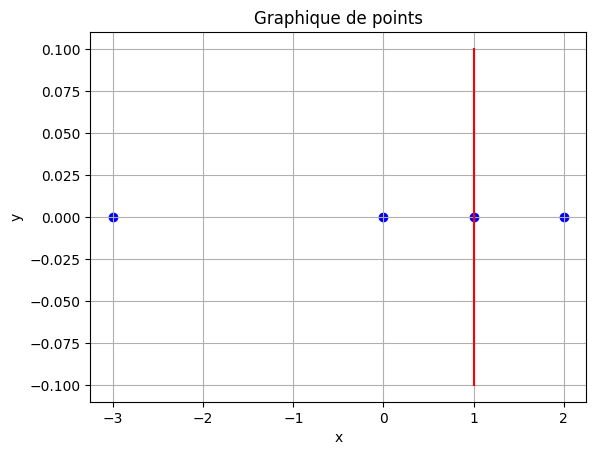

In [26]:
!pip install matplotlib
import matplotlib.pyplot as plt
inputs = [-1,2,3,4] # x
labels = [0,0,1,1] #y seulement 6 et 10 sont majeurs de 5
w = w
bias = bias
# Coordonnées des points
for x in inputs:
    x_coords = [x+bias]
    y_coords = [0]

# Créer le graphique
    plt.scatter(x_coords, y_coords, color='blue', marker='o')

plt.plot([w,w], [0.1,-0.1], linestyle='-', color='red')
# Ajouter des labels pour les axes
plt.xlabel('x')
plt.ylabel('y')

# Ajouter un titre
plt.title('Graphique de points')

# Afficher la grille
plt.grid(True)

# Afficher le graphique
plt.show()

(1.0, 3.0)

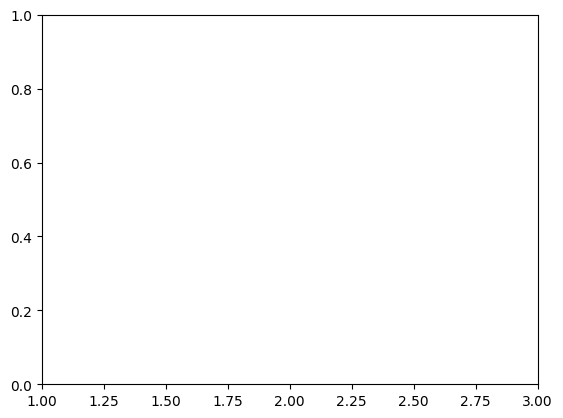

In [27]:
plt.xlim(min(x_coords) - 1, max(x_coords) + 1)


## Sources et liens

- Warren S. McCulloch et Walter Pitts, [« A Logical Calculus of the Ideas Immanent in Nervous Activity »](https://link.springer.com/journal/11538), Bulletin of Mathematical Biology, 1943. Article fondateur du concept de perceptron.

- F. Rosenblatt, [The Perceptron, a Perceiving and Recognizing Automaton Project Para](https://bpb-us-e2.wpmucdn.com/websites.umass.edu/dist/a/27637/files/2016/03/rosenblatt-1957.pdf) (Cornell Aeronautical Laboratory, 1957). La première implémentation.

- [Perceptron: explication, implémentation et un exemple visuel ](https://ichi.pro/fr/perceptron-explication-implementation-et-un-exemple-visuel-66582574588625): une bonne explication de la théorie et de l'algorithme avec le `if then` qui est la condition qui permet l'entrainement. Implémentation en python en utilisant numpy.

- [Implémentation de l'algorithme d'apprentissage Perceptron pour résoudre et passer en Python](https://ichi.pro/fr/implementation-de-l-algorithme-d-apprentissage-perceptron-pour-resoudre-et-passer-en-python-158557679913775): implémentation de la porte `ET`.

- [How To Implement The Perceptron Algorithm From Scratch In Python](https://machinelearningmastery.com/implement-perceptron-algorithm-scratch-python/): bonne explication théorique, avec la mention du stochastic gradient descent. Il y a par contre une confusion sur la définition de la fonction d'activation (qu'il appelle "prediction).

- [The Perceptron Algorithm: From Scratch Using Python ](https://www.pycodemates.com/2022/12/perceptron-algorithm-understanding-and-implementation-python.html): très bonne explication de la fonction d'activation

- [https://medium.com/@Anm.Y/understanding-the-loss-function-of-perceptron-a-key-component-in-machine-learning-3f63c8c6cddc](https://medium.com/@Anm.Y/understanding-the-loss-function-of-perceptron-a-key-component-in-machine-learning-3f63c8c6cddc) : une explication de la loss function dans le perceptron

